In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(1372, 5)


In [3]:
dataset[:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ]])

In [4]:
X = dataset[:, [1, 3]]
y = dataset[:, 4]
print(X.shape)
print(y.shape)

(1372, 2)
(1372,)


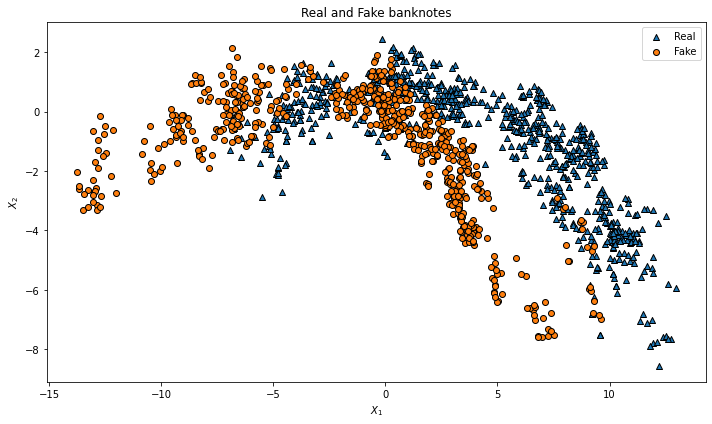

In [5]:
idx_f = [np.where(y==1)]
idx_r = [np.where(y==0)]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[idx_r, 0], X[idx_r, 1], alpha=1.0, marker="^", edgecolors="k", label="Real")
ax.scatter(X[idx_f, 0], X[idx_f, 1], alpha=1.0, marker="o", edgecolors="k", label="Fake")
ax.set_title("Real and Fake banknotes")
ax.legend()
ax.set_xlabel("$X_{1}$")
ax.set_ylabel("$X_{2}$")
fig.tight_layout()

In [7]:
model = Sequential()
model.add(
    Dense(
        1, 
        batch_input_shape=(None, 2),
        activation="sigmoid"
    )
)

sgd = optimizers.SGD(learning_rate=0.15)

model.compile(
    loss="binary_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    X, 
    y,
    epochs=400,
    batch_size=128,
    verbose=1
)

Epoch 1/400
11/11 [==============================] - 1s 900us/step - loss: 0.5252 - accuracy: 0.7281
Epoch 2/400
11/11 [==============================] - 0s 866us/step - loss: 0.5173 - accuracy: 0.7238
Epoch 3/400
11/11 [==============================] - 0s 700us/step - loss: 0.5134 - accuracy: 0.7230
Epoch 4/400
11/11 [==============================] - 0s 700us/step - loss: 0.5150 - accuracy: 0.7187
Epoch 5/400
11/11 [==============================] - 0s 800us/step - loss: 0.5150 - accuracy: 0.7157
Epoch 6/400
11/11 [==============================] - 0s 600us/step - loss: 0.5151 - accuracy: 0.7143
Epoch 7/400
11/11 [==============================] - 0s 900us/step - loss: 0.5136 - accuracy: 0.7121
Epoch 8/400
11/11 [==============================] - 0s 800us/step - loss: 0.5136 - accuracy: 0.7136
Epoch 9/400
11/11 [==============================] - 0s 798us/step - loss: 0.5127 - accuracy: 0.7092
Epoch 10/400
11/11 [==============================] - 0s 800us/step - loss: 0.5155 - accura

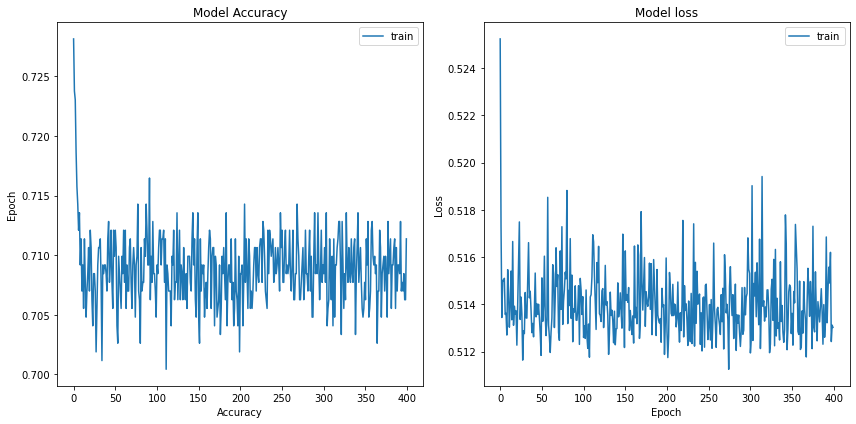

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

ax[0].plot(history.history["accuracy"], label="train")
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Accuracy")
ax[0].set_ylabel("Epoch")
ax[0].legend()

ax[1].plot(history.history["loss"], label="train")
ax[1].set_title("Model loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

fig.tight_layout()

In [11]:
x1_list = np.linspace(np.min(X[:, 0]) - 2, np.max(X[:, 0]) + 2, 50) 
x2_list = np.linspace(np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2, 50)
X1_grid, X2_grid = np.meshgrid(x1_list, x2_list)

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_model(X, y, model, t):
    
    # Grid for the 2D feature space. 
    # Predict the probability at each grid point.
    x1_list = np.linspace(np.min(X[:, 0]) - 2, np.max(X[:, 0]) + 2, 50) 
    x2_list = np.linspace(np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2, 50)
    X1_grid, X2_grid = np.meshgrid(x1_list, x2_list)
    
    p = model.predict(
        np.c_[np.ravel(X1_grid), np.ravel(X2_grid)]
    )

    
    print(p.shape)
    
    if len(p.shape) == 2 and p.shape[1] == 2:
        
        p = p[:, 1]
        
    p = np.reshape(p, X1_grid.shape)
    
    fig, ax = plt.subplots(ncols=2, figsize=(16,4))
    
    cp = ax[0].contourf(X1_grid, X2_grid, p, cmap="viridis")
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cp, cax=cax)
    ax[0].set_title(t)
    ax[0].set_ylabel("$x_{1}$")
    ax[0].set_ylabel("$x_{2}$")
    
    cp = ax[1].contourf(X1_grid, X2_grid, p, cmap="viridis")
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cp, cax=cax)
    idx_f = [np.where(y==1)]
    idx_r = [np.where(y==0)]
    
    ax[1].scatter(X[idx_r,0],X[idx_r,1], alpha=1.0,marker="^",edgecolor="black")
    ax[1].scatter(X[idx_f,0],X[idx_f,1], alpha=1.0,marker="o",edgecolor="black")
    ax[1].set_title(t)
    ax[1].set_ylabel("$x_{1}$")
    ax[1].set_ylabel("$x_{2}$")

(2500, 1)


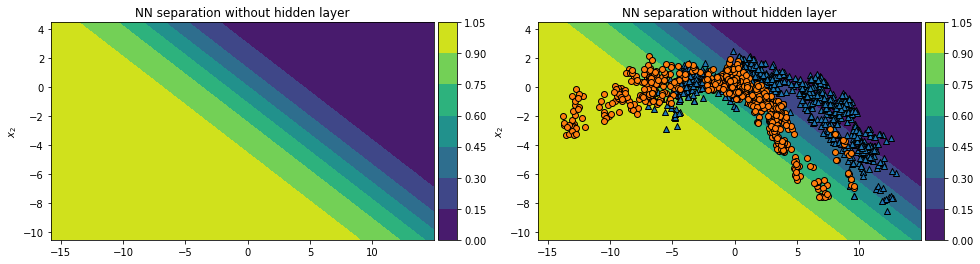

In [13]:
plot_model(X, y, model, "NN separation without hidden layer")

In [15]:
model = Sequential()
model.add(
    Dense(
        8, 
        batch_input_shape=(None, 2),
        activation="sigmoid"
    )
)

model.add(
    Dense(
        2,
        activation="softmax",
    )
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_c = to_categorical(y, num_classes=2)
print(y[:5])
print(y_c[:5])


[0. 0. 0. 0. 0.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
history = model.fit(X, y_c, epochs=400, batch_size=128, verbose=1)

Epoch 1/400
11/11 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.5357
Epoch 2/400
11/11 [==============================] - 0s 700us/step - loss: 0.6174 - accuracy: 0.6450
Epoch 3/400
11/11 [==============================] - 0s 800us/step - loss: 0.5719 - accuracy: 0.6931
Epoch 4/400
11/11 [==============================] - 0s 700us/step - loss: 0.5492 - accuracy: 0.6924
Epoch 5/400
11/11 [==============================] - 0s 700us/step - loss: 0.5348 - accuracy: 0.7085
Epoch 6/400
11/11 [==============================] - 0s 800us/step - loss: 0.5258 - accuracy: 0.7063
Epoch 7/400
11/11 [==============================] - 0s 700us/step - loss: 0.5176 - accuracy: 0.7201
Epoch 8/400
11/11 [==============================] - 0s 700us/step - loss: 0.5112 - accuracy: 0.7150
Epoch 9/400
11/11 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7259
Epoch 10/400
11/11 [==============================] - 0s 700us/step - loss: 0.5007 - accuracy: 

Text(0, 0.5, 'Loss')

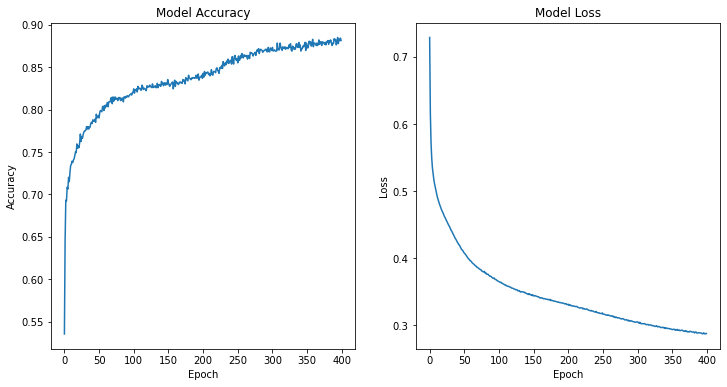

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].plot(history.history["accuracy"], label="train")
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(history.history["loss"], label="train")
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

(2500, 2)


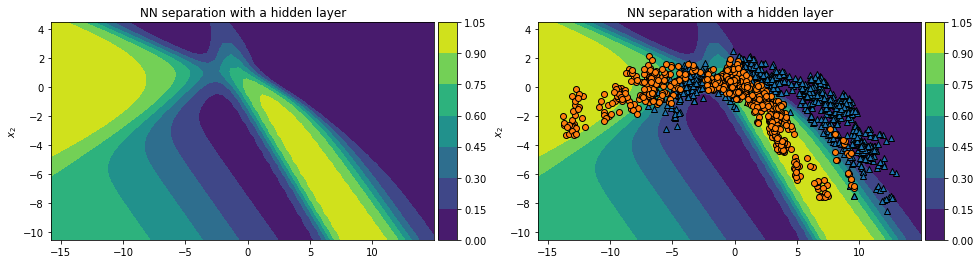

In [20]:
plot_model(X, y, model, "NN separation with a hidden layer")